In [1]:
from obspy import read
import SeisRoutine.plot as srp

In [2]:
st = read()
t = st[0].stats.starttime
picks = {'P': {'DL': (t+5).datetime,
              'Manual': t+5.5},
         'S': {'DL': t+6,
              'Manual': t+6.5}
}
linestyles = {'DL': ':', 'Man': 'solid'}
colors = {'P': 'b', 'S': 'r'}
kwargs = {'figsize': (7, 3)}

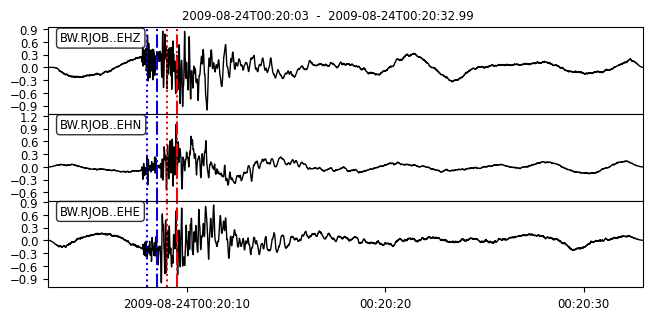

In [3]:
srp.picks_on_station_stream(st, picks, linestyles, colors, **kwargs)